In [57]:
import pandas as pd
df=pd.read_csv("C:\\Users\\lokes\\OneDrive\\Desktop\\US_price_data.csv")
df.head(8)

,DATE,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,CSUSHPISA
0,01-01-1987,328.0,4722.156,9.2040,230527.0,7.6,63.965
1,01-02-1987,328.0,4764.158,NaN,NaN,7.6,64.424
2,01-03-1987,238.0,4764.158,NaN,NaN,7.8,64.736
3,01-04-1987,328.0,4806.160,9.8325,230732.0,7.9,65.132
4,01-05-1987,329.0,4.000,NaN,NaN,8.1,65.563
5,01-06-1987,329.0,NaN,NaN,NaN,8.2,66.071
6,01-07-1987,330.0,4884.555,10.2780,230906.0,8.3,66.507
7,01-08-1987,331.0,5007.994,NaN,NaN,8.3,66.938


In [58]:
df1=df.interpolate()
df1

,DATE,Average_Earning,GDP,Mortgage,Population,Unemployment_Rate,CSUSHPISA
0,01-01-1987,328.0,4722.156,9.204000,230527.000000,7.6,63.965
1,01-02-1987,328.0,4764.158,9.413500,230595.333333,7.6,64.424
2,01-03-1987,238.0,4764.158,9.623000,230663.666667,7.8,64.736
3,01-04-1987,328.0,4806.160,9.832500,230732.000000,7.9,65.132
4,01-05-1987,329.0,4.000,9.981000,230790.000000,8.1,65.563
...,...,...,...,...,...,...,...
435,01-04-2023,363.0,26121.210,5.832000,333490.000000,3.7,300.198
436,01-05-2023,368.5,26187.265,5.862333,333492.333333,3.7,302.620
437,01-06-2023,374.0,26253.320,5.892667,333494.666667,3.7,304.651
438,01-07-2023,371.5,26253.320,5.923000,333497.000000,3.7,306.634


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [60]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
selected_features = ['Average_Earning', 'GDP', 'Mortgage', 'Population', 'Unemployment_Rate']

In [61]:
X = df1[selected_features]
y = df1['CSUSHPISA']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [71]:
predictions1 = model.predict(X_test)
predictions1

array([153.07797809,  60.65554838, 179.2735272 , 166.17186384,
       176.97020344, 162.3425327 , 131.47856503,  59.22199707,
       305.69997548, 219.5057966 , 151.6906634 ,  61.95911076,
       141.43163009, 215.89681503, 176.20907774,  61.61508393,
       301.38894922, 123.00072465,  64.99416872, 111.52361782,
        88.90936301, 127.44350395,  77.18205676, 122.87386619,
        75.20124673,  82.94624755,  66.11025717, 142.54206152,
       286.41445849,  73.84638523, 157.28313651, 173.17534557,
       115.40869662, 217.22241193, 200.59718135,  66.04019758,
       129.332032  ,  77.27087721,  84.35575315, 162.14259614,
       221.11223681,  82.23373553, 155.10549264,  59.84186706,
       113.46466672,  78.57491152, 133.04521293, 158.3122016 ,
        60.99957522, 224.950988  , 223.55299452,  77.17744818,
        95.94014296,  85.1543596 ,  62.65764878,  80.34674592,
       157.1783835 , 161.6779575 ,  71.25081126, 158.56209389,
       106.55079407,  87.28217721, 160.47041854, 224.15

In [80]:
mse = mean_squared_error(y_test, predictions1)
r2 = r2_score(y_test, predictions1)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167.21691958055774
R-squared: 0.9604068077738616


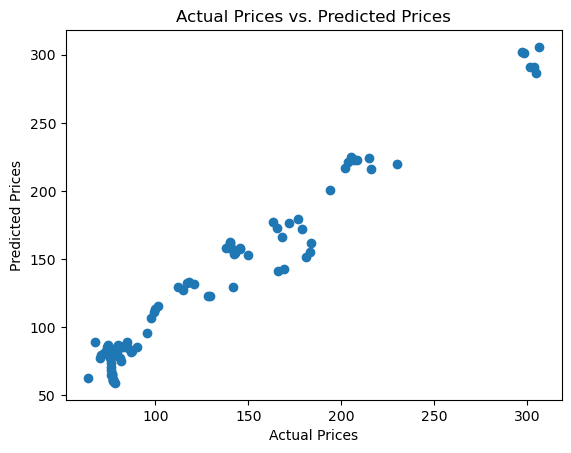

In [78]:
plt.scatter(y_test, predictions1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor


In [81]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
predictions2 = RFR.predict(X_test)
predictions2

array([149.42754,  77.79301, 176.44049, 168.48007, 162.66221, 141.0628 ,
       120.68077,  78.2551 , 307.26411, 229.74734, 180.07635,  76.9438 ,
       163.73483, 215.56579, 172.07808,  77.29072, 300.49715, 130.03896,
        76.68864, 100.1324 ,  67.70347, 115.22032,  75.77823, 128.15521,
        81.38258,  88.15198,  76.51222, 169.7899 , 301.97146,  75.97179,
       139.87877, 166.82874, 101.72005, 201.75678, 193.21012,  76.57499,
       141.19887,  80.8089 ,  76.76283, 183.50768, 203.82547,  86.7666 ,
       183.37711,  77.92787, 100.94904,  76.06871, 118.63536, 138.85837,
        77.59978, 204.98729, 206.29116,  70.2522 ,  95.07357,  85.42921,
        65.04565,  71.8353 , 144.91376, 141.0662 ,  75.98541, 138.23092,
        97.31695,  80.05651, 141.90748, 214.1161 , 142.39642, 299.5218 ,
        74.68487, 116.59265, 298.2454 ,  82.71291,  76.91369, 208.87585,
       206.86938, 147.12061, 112.10337,  84.61893, 143.51771,  72.94105,
        76.78089,  79.57721, 179.95712,  83.25208, 

In [84]:
mse1 = mean_squared_error(y_test, predictions2)
r3 = r2_score(y_test, predictions2)
print(f'Mean Squared Error: {mse1}')
print(f'R-squared: {r3}')

Mean Squared Error: 0.7272467343886809
R-squared: 0.9998278043883196


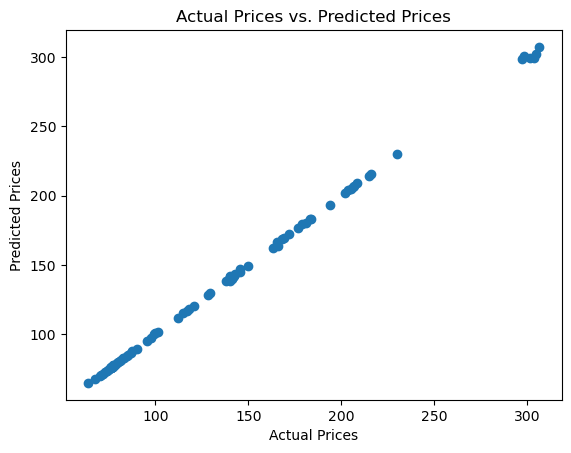

In [85]:
plt.scatter(y_test, predictions2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()